# Übung 02 - einfache Rekonstruktion

In [36]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib import cm

In [37]:
# Laden Sie die Datei "phantom_256x256.npy" aus Stud.IP herunter und platzieren Sie diese im gleichen Ordner, wie das Notebook. Dann können Sie diese Code-Zeile ausführen
plt.rcParams["figure.figsize"] = (20,10)
kspace = np.load('phantom_256x256.npy')

## Hinweis

In einigen Aufgaben wählen Sie selbsständig Werte, um Funktionen aufzurufen. Sollten Sie nach Abschluss der Aufgaben noch Zeit haben, nutzen Sie die Gelegenheit und probieren Sie die Werte interaktiv zu setzen, um zum Beispiel mit Schiebereglern ein besseres Verständnis für Auswirkungen und Nebeneffekte von verschiedenen Eingabewerten zu erhalten.

[ipywidgets](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Numeric-widgets)

## Aufgabe 1

Visualisieren Sie den K-Raum (wird in der vorherigen Code-Zeile geladen). Da es sich um komplexe Daten handelt, visualisieren Sie den Betrag und die Phase nebeneinander (durch die Verwendung von subplots). Verwenden Sie eine logarithmische Skala.

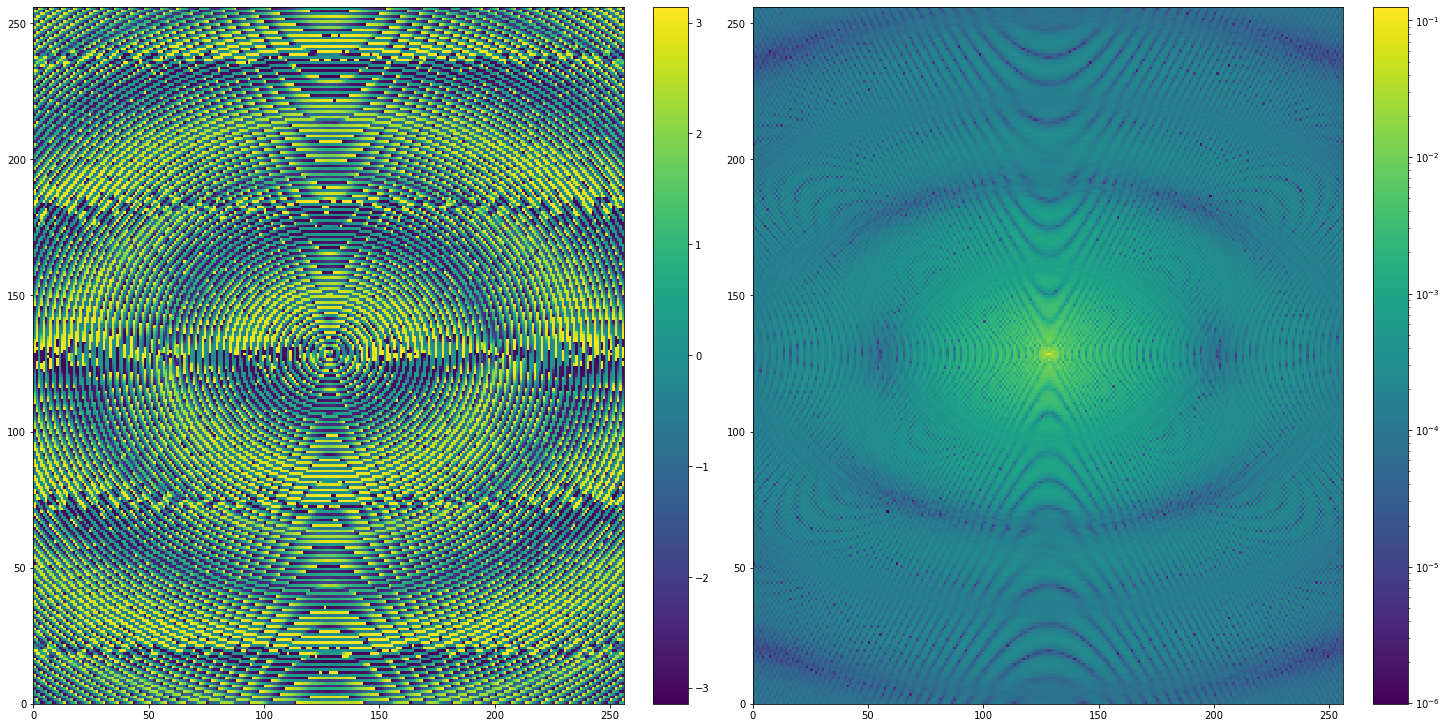

In [38]:
# K-Raum visualisieren
angle_kspace  = np.angle(kspace)
abs_kspace = np.abs(kspace)

viridis = cm.get_cmap('viridis')

fig, axs = plt.subplots(1, 2, constrained_layout=True, squeeze=False)
psm = axs[0, 0].pcolormesh(angle_kspace, cmap=viridis, rasterized=True)
fig.colorbar(psm, ax=axs[0, 0])
psm = axs[0, 1].pcolormesh(abs_kspace, cmap=viridis, rasterized=True, norm=colors.LogNorm())
fig.colorbar(psm, ax=axs[0, 1])
plt.show()

Wo befindet sich das Maximum des K-Raums und warum?

Das Maximum des K-Raums befindet sich in der Mitte (125|125) des Bildes, da dort sich alle Signale überlappen.

(optional) Der k-Raum weist eine bestimmte Symmetrie auf. Erkennen Sie diese?


## Aufgabe 2

Rekonstruieren Sie das Bild und stellen Sie es dar. Hilfreiche Funktionen für diese und folgende Aufgaben finden Sie in dem Modul [numpy.fft](https://numpy.org/doc/1.22/reference/routines.fft.html?highlight=numpy%20fft#module-numpy.fft). Wenn es nicht explizit anders in der Aufgabe steht, soll immer das Betrags-Bild visualisiert werden.


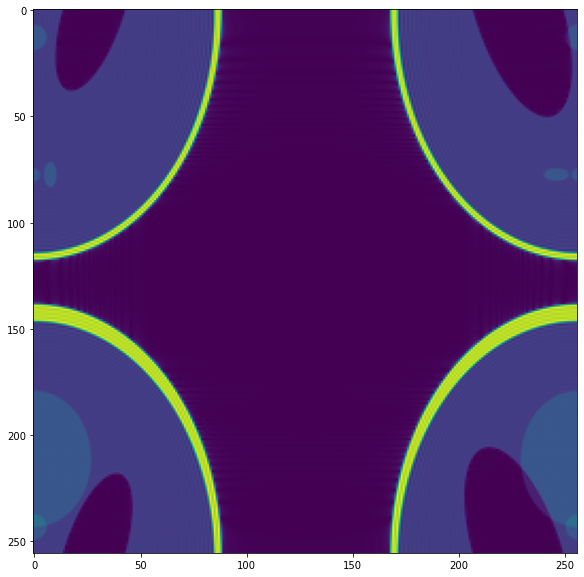

In [39]:
# Reko durch ifft
reco = np.fft.ifft2(kspace)
abs_reco = np.abs(reco)
plt.imshow(abs_reco)

Beschreiben Sie, was man auf dem Bild sieht und stellen sie Vermutungen auf, warum die Abbildung so aussieht.

Auf dem Bild ist das rekonstruierte Signal zu sehen, welches das MRT gemessen hat. Das Signal befindet sich allerdings im Bereich x_2

## Aufgabe 3

Korrigieren Sie Ihre Bildrekonstruktion so, dass das richtige Bild zu sehen ist.

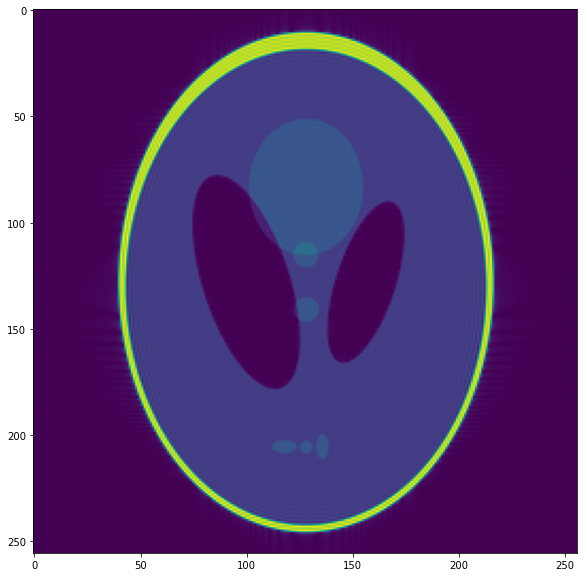

In [40]:
# Reko durch ifft
reco = np.fft.ifftshift(np.fft.ifft2(kspace))
abs_reco = np.abs(reco)
plt.imshow(abs_reco)

##  Aufgabe 4
Verwenden Sie jetzt statt der ifft die fft-Funktionen der Library und vergleichen Sie das Betrags- und Phasenbild der beiden Verfahren miteinander.Nutzen Sie Subplots um die Ergebnisse geeignet darzustellen.

In [41]:
# Reko durch fft (Betragsbilder)
reco = np.fft.fftshift(np.fft.fft2(kspace))
reco_abs = np.abs(reco)

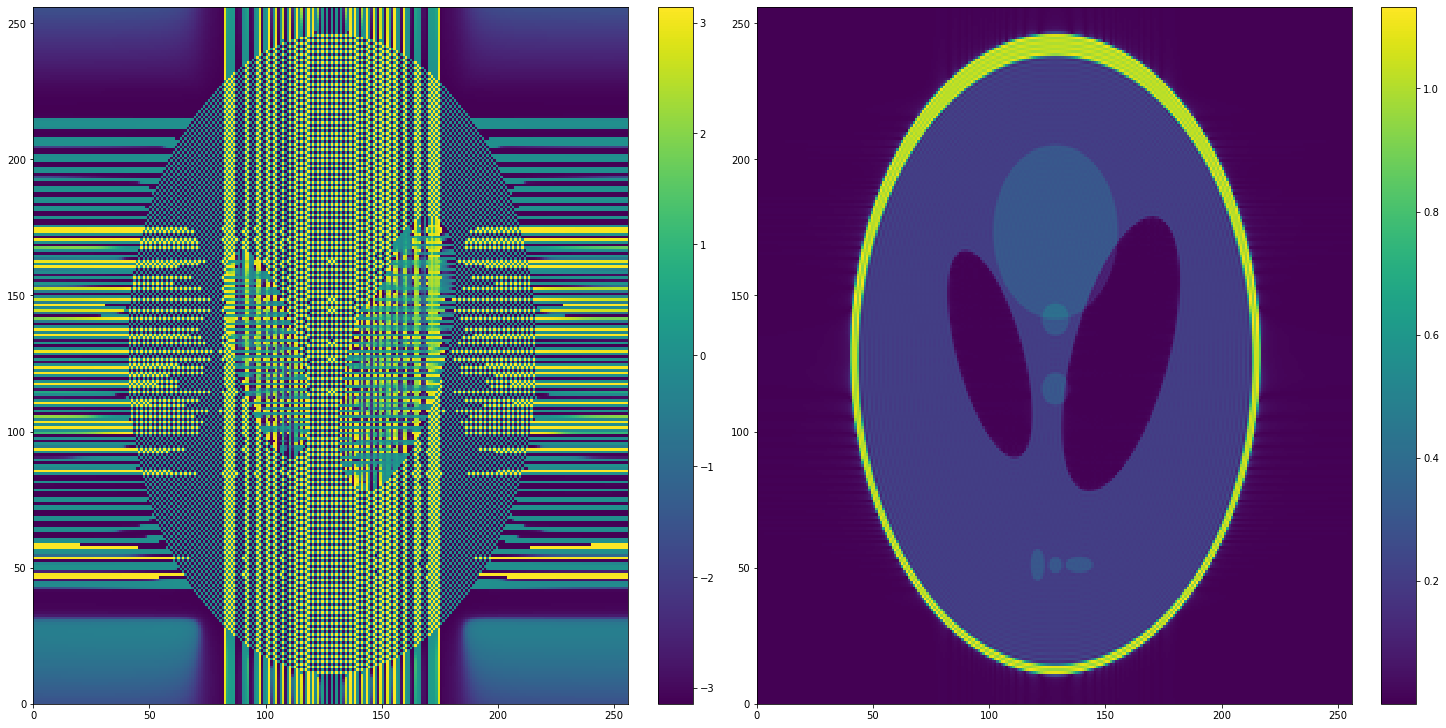

In [42]:
# Reko durch fft (Phasenbilder)
reco_angle = np.angle(reco)

fig, axs = plt.subplots(1, 2, constrained_layout=True, squeeze=False)
psm = axs[0, 0].pcolormesh(reco_angle, cmap=viridis, rasterized=True)
fig.colorbar(psm, ax=axs[0, 0])
psm = axs[0, 1].pcolormesh(reco_abs, cmap=viridis, rasterized=True)
fig.colorbar(psm, ax=axs[0, 1])
plt.show()

Worin unterscheiden sich die Bilder?
Die Bilder sind um die y-Achse gespiegelt.

## Aufgabe 5

Setzen Sie jetzt die Mitte des k-Raums auf 0 (suchen sie sich einen angemessenen Radius aus)
und rekonstruieren Sie dann den manipulierten k-Raum. Probieren Sie das Ganze für verschiedene Radien aus.


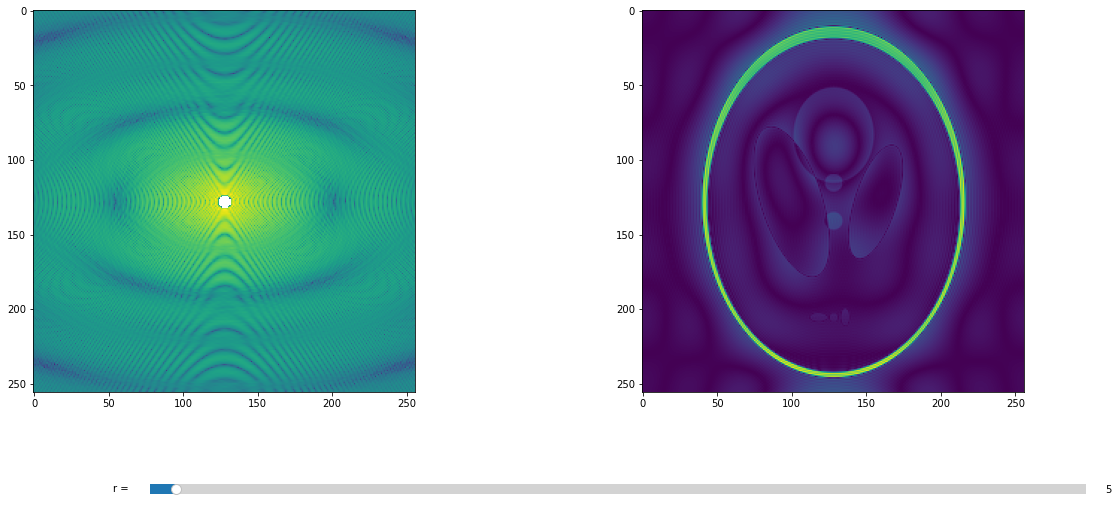

In [71]:
from matplotlib.widgets import Slider

def zero_circle(array, r):
    ret_array = np.copy(array)
    x = np.arange(array.shape[0])
    y = np.arange(array.shape[1])
    cx = array.shape[0] / 2
    cy = array.shape[1] / 2

    ret_array[(x[np.newaxis, :] - cx) ** 2 + (y[:, np.newaxis] - cy) ** 2 < r ** 2] = 0
    return ret_array

# plt.imshow(np.abs(zero_circle(kspace, 10)))
# plt.imshow(np.abs(np.fft.ifftshift(np.fft.ifft2(zero_circle(kspace, 10)))))

fig = plt.figure()
plt.subplots_adjust(bottom=0.35)
axs = fig.subplots(1, 2)

ax_r = plt.axes([0.25, 0.2, 0.65, 0.03])
r_slider = Slider(ax_r, 'r = ', 0, 181, valinit=5, valstep=1)

def update():
    new_kspace = zero_circle(kspace, r_slider.val)
    axs[0].imshow(np.abs(new_kspace), norm=colors.LogNorm())
    axs[1].imshow(np.abs(np.fft.ifftshift(np.fft.ifft2(new_kspace))))

r_slider.on_changed(update)

update()


Beschreiben Sie, was sich ändert und versuchen Sie zu deuten, woran das liegt.

<span style="color:blue">(TODO - Schreiben Sie Ihre Antwort hier hin!) </span>

## Aufgabe 6

Setzen Sie jetzt umgekehrt den äußeren Bereich des k-Raums auf 0,
rekonstrieren Sie das Bild und beschreiben Sie, was sich in diesem Fall ändert und versuchen zu deuten, woran das liegt. Probieren Sie hier ebenfalls verschiedene Werte für den Radius aus.

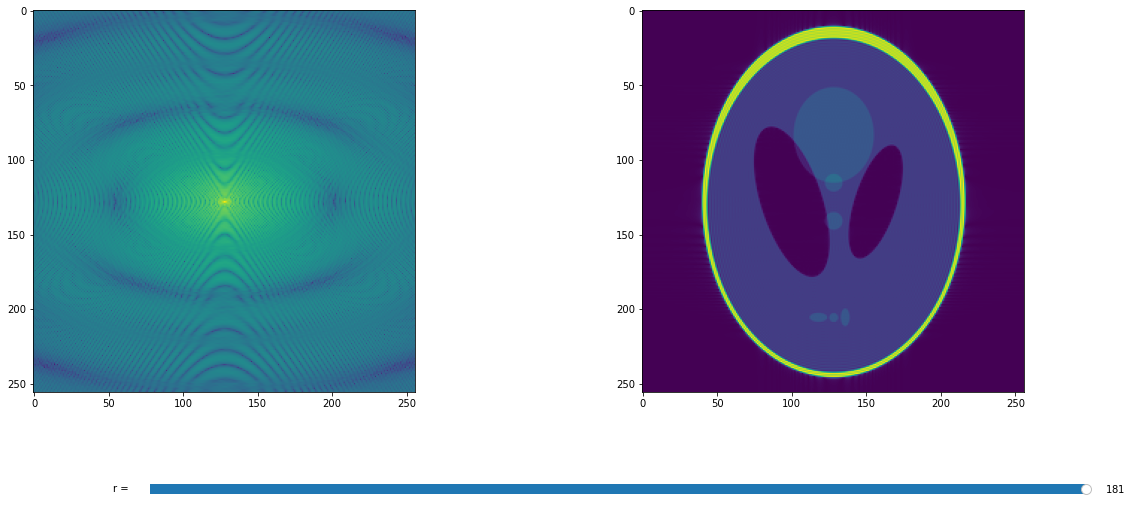

In [70]:
def zero_outside_circle(array, r):
    ret_array = np.copy(array)
    x = np.arange(array.shape[0])
    y = np.arange(array.shape[1])
    cx = array.shape[0] / 2
    cy = array.shape[1] / 2

    ret_array[(x[np.newaxis, :] - cx) ** 2 + (y[:, np.newaxis] - cy) ** 2 >= r ** 2] = 0
    return ret_array

# plt.imshow(np.abs(zero_circle(kspace, 10)))
# plt.imshow(np.abs(np.fft.ifftshift(np.fft.ifft2(zero_circle(kspace, 10)))))

fig = plt.figure()
plt.subplots_adjust(bottom=0.35)
axs = fig.subplots(1, 2)

ax_r = plt.axes([0.25, 0.2, 0.65, 0.03])
r_slider = Slider(ax_r, 'r = ', 0, 181, valinit=181, valstep=1)

def update():
    new_kspace = zero_outside_circle(kspace, r_slider.val)
    axs[0].imshow(np.abs(new_kspace), norm=colors.LogNorm())
    axs[1].imshow(np.abs(np.fft.ifftshift(np.fft.ifft2(new_kspace))))

r_slider.on_changed(update)

update()

Beschreiben Sie, was sich ändert und versuchen Sie zu deuten, woran das liegt.

<span style="color:blue">(TODO - Schreiben Sie Ihre Antwort hier hin!) </span>

## Aufgabe 7

Rekonstruieren Sie den K-Raum ein weiteres mal, diesmal nachdem Sie jede zweite Zeile auf 0 gesetzt haben.

Beschreiben und deuten Sie das Ergebnis.

<span style="color:blue">(TODO - Schreiben Sie Ihre Antwort hier hin!) </span>


## Aufgabe 8

Rekonstruieren Sie den K-Raum ein weiteres mal, diesmal nachdem Sie jede zweite Spalte auf 0 gesetzt haben.

Beschreiben und deuten Sie das Ergebnis.

<span style="color:blue">(TODO - Schreiben Sie Ihre Antwort hier hin!) </span>

## Aufgabe 9

Setzen Sie nun einen Punkt im K-Raum auf einen hohen Wert (z.B. auf das Maximum der Daten)und rekonstruieren Sie das Bild. Probieren Sie dies mit verschiedenen Koordinaten aus.

Beschreiben Sie, wie sich ein solcher (fehlerhafter) Ausreisser im K-Raum auswirkt und deuten Sie woran das liegt.

<span style="color:blue">(TODO - Schreiben Sie Ihre Antwort hier hin!) </span>

Nutzen Sie, wenn Sie Zeit haben, bei dieser Aufgabe nicht nur ein, sondern zwei ipywidgets, um die Koordinaten des Punktes dynamisch anpassen zu können.
Gehen Sie auch die anderen Aufgaben noch einmal durch und setzen Sie auf die gleiche Art und Weise zum Beispiel den Radius oder die Anzahl der auf 0 zu setzenden Zeilen/Spalten.